## A/B Testing Marketing Promotions

Which promotion was the most effective?

**SCENARIO** 

A retailer plans to add a new product to its catalogue. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promoition is used at each location and the weekly sales of the new items are recorded for the first four weeks. 

The description of the dataset: Our data set consists of 548 entries including: 

- MarketId: an inhouse tag used to describe market types, which we won't need to use. 

- AgegOfStores: Age of store in years (1-28). The mean age of a store is 8.5 years. 

- LocationID: Unique identifier for store location. Each location is identified by a number and the total number of stores is 37. 

- Promotion: One of 3 promotions that were tested (1,2,3). We don't really know the specifics of each promotion. Nor does it really matter. 

- Sales In Thousands: Sales amount for a specific LocationID, promotion and week. The mean amount of sales are 53.5 thousand dollars. 

- Market size: There are 3 types of market size: small, medium, large. 

- Week: One of four weeks when the promotions were run (1-4)

**Null Hypothesis**

- There is no difference between the different promotions

**Alternative Hypothesis**

- One of the promotions is (B) is better than the other (A) 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv"
df = pd.read_csv(file_name)

df.head(10)


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


For Location ID 1, you can see that's 1 store's activity over 4 weeks. 

In [5]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [6]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


The max age for a store is 28 years old and the min age is 1 year old

There is an average of ~53 thousand in sales a week

## EDA and Visualizations

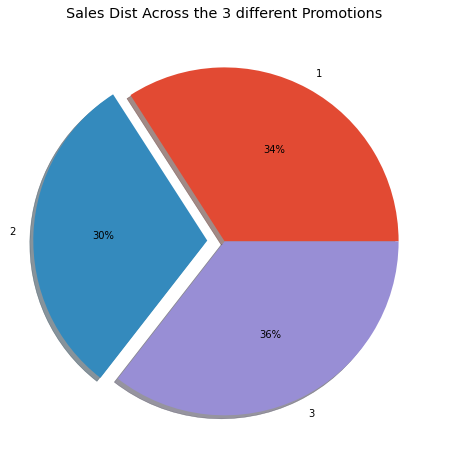

In [8]:
# Let's create some plots to visualize our sales and marketing data 

# Using ggplot's style

plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct = '%1.0f%%',
                                                                shadow = True,
                                                                explode = (0,0.1,0))

ax.set_ylabel('')
ax.set_title('Sales Dist Across the 3 different Promotions')

plt.show()

What was the most domininant promotion in terms of sales? 

In [10]:
# Let's view the promotions for each market size

df.groupby(['Promotion', "MarketSize"]).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

All of this should add up to 548. We see the breakdown of what was used.

In [12]:
# let's take a look at the 'unstack' function in pandas. it'll be helpful to flatten the above date 

df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


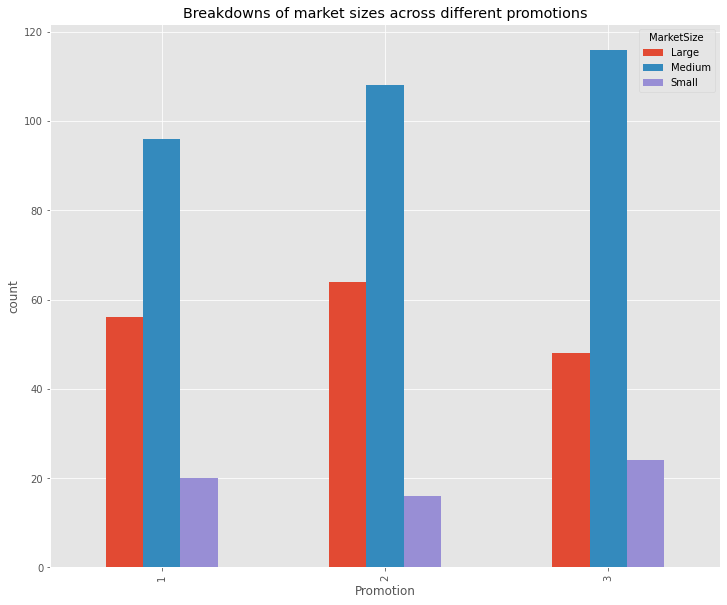

In [11]:
# Great now let's put the above info into a plot 

ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True)

ax.set_ylabel('count')
ax.set_title("Breakdowns of market sizes across different promotions")

plt.show()

We can see for the small stores aren't that common, however the medium stores are very common. The Large stores are in the middle. 

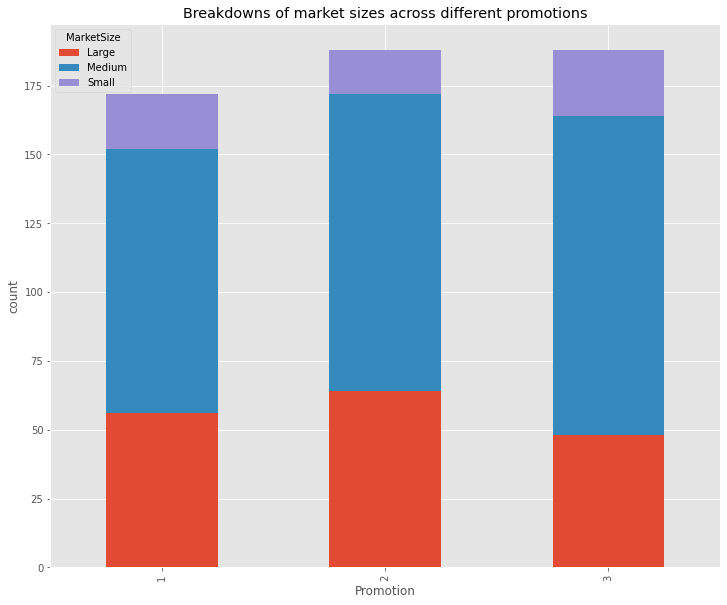

In [13]:
# Now let's put this into a stacked barchart plot to see if we can get it looking better 

ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True, 
    stacked=True)

ax.set_ylabel('count')
ax.set_title("Breakdowns of market sizes across different promotions")

plt.show()

Visually this stacked barchart doesn't work as well. It's easier to visualize with the normal barchart

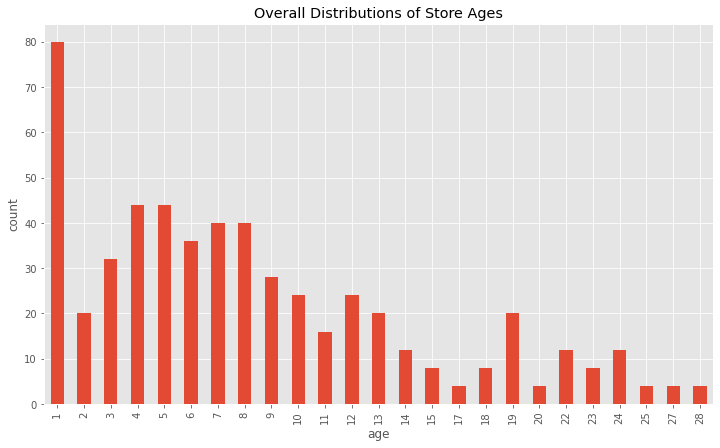

In [15]:
# Let's take a look at the overall distributions of store ages 

ax = df.groupby("AgeOfStore").count()['MarketID'].plot(
    kind='bar',
    figsize=(12,7),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions of Store Ages')

plt.show()

Quite interesting. Majority of the stores are new - 1 year old. The nthere's a peak around 5 years old, and starts to descend. 

In [16]:
# Let's group by age of store and promotion to get counts

df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID']

AgeOfStore  Promotion
1           1            24
            2            36
            3            20
2           1             8
            2             8
            3             4
3           1            16
            2            12
            3             4
4           1            16
            2            12
            3            16
5           1             8
            2            12
            3            24
6           1            20
            2             4
            3            12
7           1             4
            2            24
            3            12
8           1            12
            2             8
            3            20
9           1             8
            2            12
            3             8
10          2            16
            3             8
11          1             4
            3            12
12          1            12
            2             4
            3             8
13          1            1

For stores that are 1 year old, 24 use promotion 1, 36 use promotion 2, and 20 use promotion 3

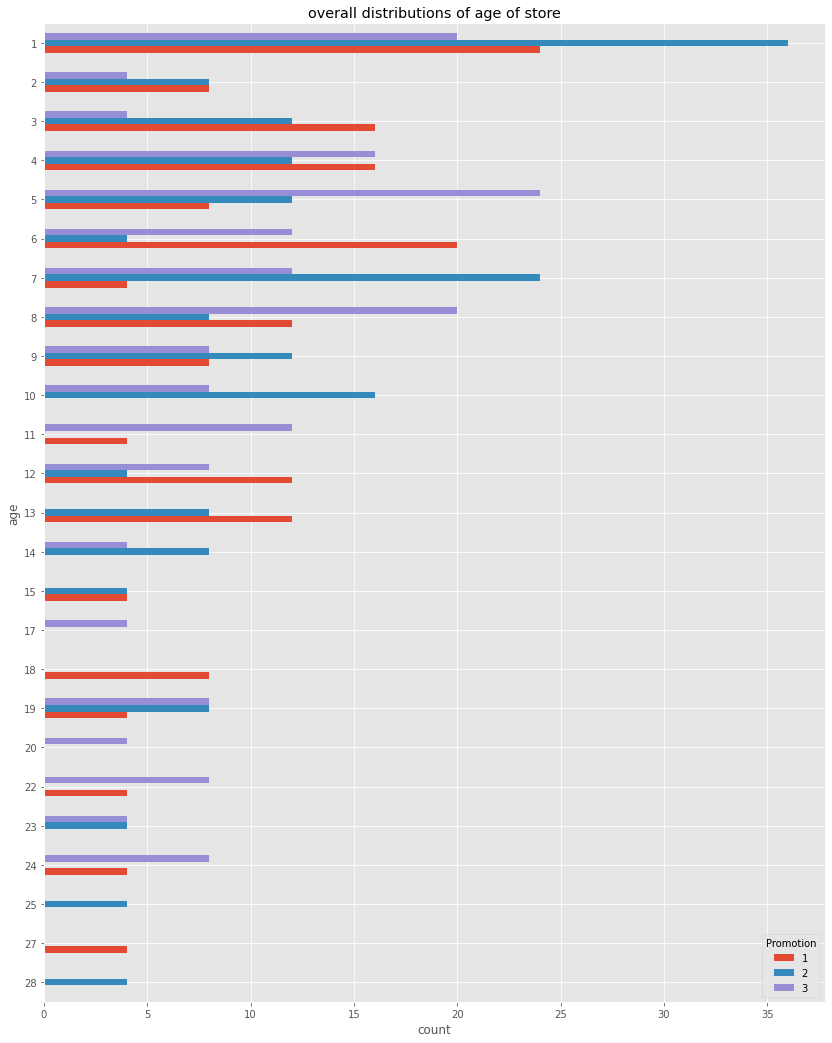

In [17]:
# Let's visualize the above summary 

ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh',
    figsize=(14,18),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [18]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


This table makes it easy to understand the overall store age distribution from our summary stats. 

All test groups have similar age profiles and the average store age is 8 to 9 years old for these 3 groups. 

The majority of the stores are 1012 years old or even younger 

We can see that the store frofiles are similar to eachother, which indicates that are sample groups are well controlled and the **A/B testing results will be meaningful and trustworthy**

## Performing A/B Testing

In [19]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']

In [22]:
print(means)
print(stds)
print(ns) #number of samples

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


### T-Value

The t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the groups 

### P-Value 

The P-value measures the probability that the results would occur by random chance. Therefore, the smaller the p-value is, the more statistically significant the difference there will be between the two groups

# Comparing Promotion 1 vs Promotion 2 in an A/B Test

In [23]:
# computing the t an p values using scipy
from scipy import stats 

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
                       equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


## Analysis of P and T-Values

Our **P-Value is close 0** which suggests that there is good evidence to **REJECT the Null Hypothesis** -- meaning that there is a statistical difference between the two groups. 

Our threshold for rejecting the null hypothesis is usually less than 0.05

Our **t-test** shows that the marketing performances for these two groups are significantly different and that promotion group 1 out-performs promotion group 2. 

The one with the larger mean is group 1.

# Comparing Promotion 1 vs Promotion 3 in an A/B Test

However, if we run a t-test between the promotion group 1 and group 3, we will see different results:

In [24]:
t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
                       equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


## Analysis of P and T-Values

We note that the avg sales from promotion group 1 (58.1) is higher than those from promotion group 3 (55.36).

But after running the t-test between these two gruops, we get a t-value of 1.556 and a p-value of 0.121. 

The computed **p-value is a lot higher than 0.05**, past the threshold for statistical significance. 

We can't conclude anything from these results to reject our null hypothesis. The null hypothesis always states that there is no difference. So we accept the null hypothesis because our p-value is so high. The difference between the means, because they're relatively close, we can say the difference is purely due to random chance - probably because we don't have enough stats